## Project: Tweet Generator - Reflection with LangChain 

In [1]:
# Loading the .env file
import os
from dotenv import load_dotenv, find_dotenv
env_file = load_dotenv(find_dotenv(), override=True)
if env_file:
    print(".env file is loaded")
else:
    print(".env file not found")

.env file is loaded


In [ ]:
# importing the necessary libraries
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
client = ChatOpenAI(api_key=os.environ.get("OPENAI_API_KEY"))
if client:
    print("Authentication Successful with OpenAI.")
else:
    print("Authentication Failed with OpenAI")
    

Authentication Successful with OpenAI.


#### GENERATE - This generates the initial responses

In [ ]:
# Creating a chat prompt template
# MessagesPlaceholder - is a dynamic part of the prompt, that will be filled with all the revision from the reflector later on.
generation_prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system',
            '''You are a Twitter expert assigned to craft outstanding tweets.
            Generate the most engaging and impactful tweet possible based on the user's request.
            If the user provides feedback, refine and enhance your previous attempts accordingly for maximum engagement.'''
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

# using LCEL (LangChain Expression Language) to create the generate_chain
generate_chain = generation_prompt | llm  # feeding the generation prompt into the LLM

In [7]:
generate_chain

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [8]:
tweet = "" # to store the generated tweet

request = HumanMessage(
    content = "FIFA World Cup 26"
)

# Streaming the response from generate chain
for chunk in generate_chain.stream(
    {'messages': [request]}
):
    print(chunk.content, end='')
    tweet += chunk.content

🌍⚽️ Excitement is building for the FIFA World Cup 2026! 🏆✨ With matches spread across the USA, Canada, and Mexico, it's set to be the biggest celebration of football yet! Who are you rooting for? Let the countdown begin! ⌛️🇺🇸🇨🇦🇲🇽 #WorldCup2026 #FootballFever #SoccerUnited

### Reflect and Repeat

In [9]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """You are a Twitter influencer known for your engaging content and sharp insights.
            Review and critique the user's tweet. 
            Provide constructive Feedback, focusing on enhancing it's depth, style and overall impact.
            Offer specific suggestions to make the tweet more compelling and engaging for their audience."""
        ),
        MessagesPlaceholder(variable_name="messages"), # here it contains the history messages for Agents to critise and make recommendations for improving.
    ]
)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)
reflect_chain = reflection_prompt | llm

In [10]:
reflect_chain

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [ ]:
reflection = "" # to store the generated tweet

# Streaming the response from reflect chain using generate_chain initial tweet
for chunk in reflect_chain.stream(
    {"messages": [request, HumanMessage(content = tweet)]}
):
    print(chunk.content, end="")
    reflection += chunk.content 
    

Your tweet does a great job of capturing the excitement surrounding the FIFA World Cup 2026! The emojis add a fun and engaging visual element, and you’ve effectively highlighted the diversity of the event by mentioning the three host countries. Here’s some constructive feedback to enhance its depth, style, and overall impact:

1. **Add a Personal Touch**: Share your personal connection to the World Cup or a memorable moment from past tournaments. This invites your followers to engage on a more personal level.
   - **Suggestion**: "As a lifelong fan, I can’t wait to see how the energy of the fans in the USA, Canada, and Mexico will shape this historic event!"

2. **Pose a Thought-Provoking Question**: Instead of just asking who people are rooting for, you could delve deeper. 
   - **Suggestion**: "Which underdog team do you think will surprise us this year?" This invites more discussion.

3. **Incorporate a Fact or Statistic**: A compelling fact can pique interest and provide context.
 

In [ ]:
## with Generator : Response is -
🌍⚽️ Excitement is building for the FIFA World Cup 2026! 🏆✨ With matches spread across the USA, Canada, and Mexico, it's set to be the biggest celebration of football yet! Who are you rooting for? Let the countdown begin! ⌛️🇺🇸🇨🇦🇲🇽 #WorldCup2026 #FootballFever #SoccerUnited

## With Reflector : Response is - 

🌍⚽️ Excitement is building for the FIFA World Cup 2026! 🏆✨ As a lifelong fan, I can’t wait to see how the energy of the fans in the USA, Canada, and Mexico will shape this historic event! Did you know this will be the first World Cup featuring 48 teams? That’s more football excitement! 🥳 Who’s your underdog pick to surprise us? Share your favorite World Cup memory or prediction! Let the countdown begin! ⌛️🇺🇸🇨🇦🇲🇽 #WorldCup2026 #FootballFever #SoccerUnited #FIFA2026 #SoccerCulture

In [12]:
## Call Generator_chain with initial tweet and reflections as input 

for chunk in generate_chain.stream(
    {"messages": [request, AIMessage(content=tweet), HumanMessage(content=reflection)]}
):
    print(chunk.content, end = "")

🌍⚽️ The excitement for the FIFA World Cup 2026 is off the charts! 🏆✨ As a lifelong fan, I can't wait to see how the energy of the fans in the USA, Canada, and Mexico shapes this historic event! Did you know it’s the first World Cup featuring 48 teams? More football, more thrills! 🥳 

Which underdog team do you think will surprise us this year? Share your favorite World Cup memory or prediction in the comments! Let’s kick off this countdown together! ⌛️🇺🇸🇨🇦🇲🇽 #WorldCup2026 #FootballFever #SoccerUnited #FIFA2026 #SoccerCulture

### Define the Graph - 1

In [ ]:

# First, define a TypedDict to structure your state, with the "messages" key to accumulate messages via a reducer like add_messages.
# This ensures that each node’s messages get appended, not overwritten. 

from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages

In [21]:
# 1. Define your state schema
## Graph - State Schema
class State(TypedDict):
    # Accumulate messages across nodes
    messages: Annotated[list[BaseMessage], add_messages]

# 2. Define your nodes as State → State transitions
## Nodes
# define a function for the generation node
def generation_node(state: State) -> dict:
    """Call the generator with the running message history and append its reply."""
    ai_msg: BaseMessage = generate_chain.invoke({"messages": state["messages"]})
    return {"messages": [ai_msg]}

def reflection_node(state: State) -> dict:
    """
    Reflect on the conversation so far and append feedback as a HumanMessage
    (so the generator treats it like human guidance).
    """
    cls_map = {"ai": HumanMessage, "human": AIMessage}
    msgs = state["messages"]
    translated = [msgs[0]] + [cls_map[m.type](content=m.content) for m in msgs[1:]]
    res: BaseMessage = reflect_chain.invoke({"messages": translated})
    return {"messages": [HumanMessage(content=res.content)]}

# ---- Control flow ----
MAX_ITERATIONS = 3

def should_continue(state: State):
    """Stop after MAX_ITERATIONS generated messages, otherwise go to 'reflect'."""
    if len(state["messages"]) > MAX_ITERATIONS:
        return END
    return "reflect"

builder = StateGraph(state_schema=State)
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)

# setting the generate node as the starting point
builder.set_entry_point("generate")

# adding a conditional edge to the graph
builder.add_conditional_edges("generate", should_continue)
builder.add_edge("reflect", "generate")

# compiling the graph
graph = builder.compile()

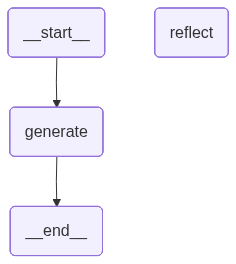

In [22]:
# Display the graph
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
from langchain_core.messages import HumanMessage

# NEW: pass a state dict with a "messages" list
inputs = {"messages": [HumanMessage(content="Generate a tweet about FIFA World Cup 26")]}

# Invoke the graph and get the final state back
final_state = graph.invoke(inputs)

# Print all messages in the final state
for msg in final_state["messages"]:
    print(msg.content)
    print("\n" + "-" * 100 + "\n")

Generate a tweet about FIFA World Cup 26

----------------------------------------------------------------------------------------------------

🌍⚽️ Get ready for the ultimate showdown! The FIFA World Cup 2026 is coming to North America, where passion meets the pitch! 🇺🇸🇨🇦🇲🇽 Who's your pick to lift the trophy? 🏆 Let the countdown begin! #WorldCup2026 #FIFA #SoccerLove

----------------------------------------------------------------------------------------------------

This tweet has a lot of great elements! It’s enthusiastic, visually engaging with emojis, and invites interaction by asking a question. However, to enhance its depth, style, and overall impact, consider the following suggestions:

1. **Add a Unique Angle**: Instead of a general statement about the World Cup, incorporate a specific aspect that makes this event unique. You could mention the diversity of the host countries or the historical significance of the tournament being held across three nations.

2. **Incorporate a P